<a href="https://colab.research.google.com/github/hollyplank/Essex-Group-2/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#Data Analysis Libraries
import pandas as pd
import numpy as np

In [77]:
#Data Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#For machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [79]:
#Puts files from github into colab 
! git clone https://github.com/hollyplank/Essex-Group-2.git

fatal: destination path 'Essex-Group-2' already exists and is not an empty directory.


In [80]:
#Reading files from the github page  
train = pd.read_csv('Essex-Group-2/train.csv')
test = pd.read_csv('Essex-Group-2/test.csv')

In [81]:
#Printing to ensure that files have been correctly accessed 
print(train)
print(test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [82]:
#Printing To See What Column Variables Exist &  What data type they are
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [83]:
# This generates a table containing the number of missing entries of each catogrie in the data
def nulldata(df):
  nulls = df.isnull().sum().sort_values(ascending = False)
  total = round(((nulls - nulls) + len(df)), 2)
  return pd.concat([nulls, total], axis = 1, keys = ['No. Values Missing', 'Out Of'])

In [84]:
# This shows to the user a table giving the total number of missing values for each category
nulldata(train)

,No. Values Missing,Out Of
Cabin,687,891
Age,177,891
Embarked,2,891
Fare,0,891
Ticket,0,891
Parch,0,891
SibSp,0,891
Sex,0,891
Name,0,891
Pclass,0,891


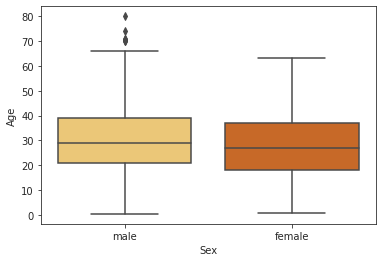

In [85]:
sns.set_style("ticks")
sns.boxplot(x = 'Sex', y = 'Age', palette="YlOrBr", data=train)
#This creates a box plot which give average ages to each sex so for men it is roughly just before their 30's 
#And for women it is around their mid 20's

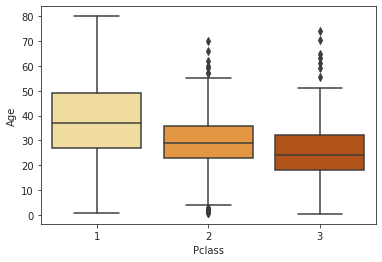

In [86]:
sns.boxplot(x = 'Pclass', y = 'Age', palette="YlOrBr", data=train)

In [87]:
print(train.isnull().sum())
def AvgAge_train(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age): 
    if Pclass == 1:
      return 38
    elif Pclass == 2:
        return 29
    else:
          return 25
  else:
        return Age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


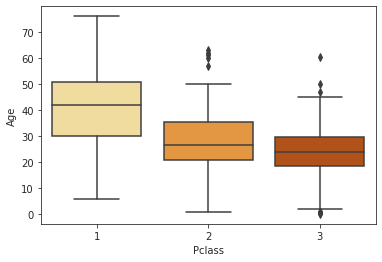

In [88]:
sns.boxplot(x = 'Pclass', y = 'Age', palette="YlOrBr", data=test)

In [89]:
def AvgAge_test(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age): 
    if Pclass == 1:
      return 39
    elif Pclass == 2:
        return 27
    else:
          return 22
  else:
        return Age

In [90]:
train['Age'] = train[['Age', 'Pclass']].apply(AvgAge_train, axis = 1)

In [91]:
sex_train = pd.get_dummies(train['Sex'], sparse = False)
embarked_train = pd.get_dummies(train['Embarked'], sparse = False)

In [92]:
train = pd.concat([train, sex_train, embarked_train], axis = 1)

In [93]:
nulldata(train)

,No. Values Missing,Out Of
Cabin,687,891
Embarked,2,891
S,0,891
SibSp,0,891
Survived,0,891
Pclass,0,891
Name,0,891
Sex,0,891
Age,0,891
Ticket,0,891


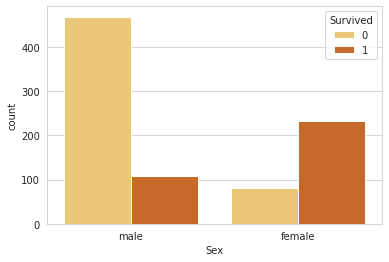

In [94]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = 'Survived', palette="YlOrBr", data = train)
#This shows number of men and women who did or did not survive which actually shows us you were a lot more likely to die 
#If you were male 

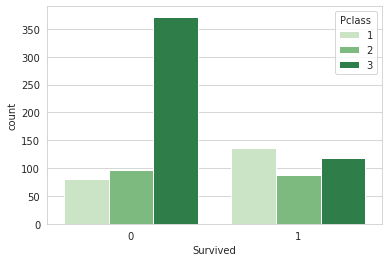

In [107]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = "Pclass", palette="Greens", data = train)

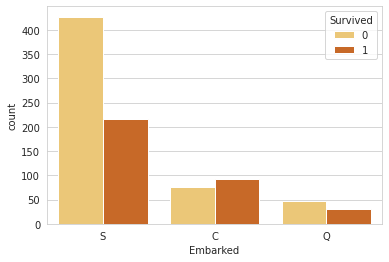

In [96]:
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked', hue = "Survived", palette="YlOrBr", data = train)
#This creates a graph showing how many people from each port survived, so from this we can tell that people from the 
#S labelled port were much more likely to survive the titanic

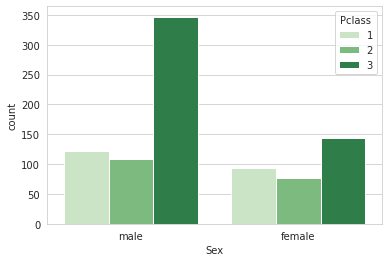

In [106]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = "Pclass",palette="Greens", data = train)

In [ ]:
test['Age'] = test[['Age', 'Pclass']].apply(AvgAge_test, axis = 1)

In [ ]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)
train['Embarked'].fillna(train['Fare'].median(), inplace = True)

In [ ]:
train.drop('Cabin', axis = 1, inplace = True)
train.drop('Name', axis = 1, inplace = True)
train.drop('Ticket', axis = 1, inplace = True)
train.drop('Embarked', axis = 1, inplace = True)
train.drop('Sex', axis = 1, inplace = True)
#Removing the columns from the data set 

In [ ]:
test.drop('Cabin', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [ ]:
sex_test = pd.get_dummies(test['Sex'], sparse = False)
test.drop('Sex', axis = 1, inplace = True)

In [ ]:
embarked_test = pd.get_dummies(test['Embarked'], sparse = False)
test.drop('Embarked', axis = 1, inplace = True)

In [ ]:
test = pd.concat([test, sex_test, embarked_test], axis = 1)

In [ ]:
print(train.info())

In [ ]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test
print(test.info())

In [ ]:
lRegression = LogisticRegression(solver = 'newton-cg')
lRegression.fit(X_train, y_train)
lRegressionY_Predict = lRegression.predict(X_test)
lRegressionAcc = lRegression.score(X_train, y_train)
print('Accuracy with the Logistic Regression model is: ', round(lRegressionAcc, 2))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors = 3)
kNN.fit(X_train, y_train)
kNNY_Predict = kNN.predict(X_test)
kNNAcc = kNN.score(X_train, y_train)
print('Accuracy with the k-Nearest Neighbors model is: ', round(kNNAcc, 2))

In [ ]:
rForest = RandomForestClassifier()
rForest.fit(X_train, y_train)
rForestY_Predict = rForest.predict(X_test)
rForestAcc = rForest.score(X_train, y_train)
print('Accuracy with the Random Forest model is: ', round(rForestAcc, 2))

In [ ]:
gender_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived': rForestY_Predict})
gender_submission.to_csv('Essex-Group-2/gender_submission.csv', index = False)